# Energy Efficiency Dataset ile Regresyon Modelleri

Bu atölyede, enerji verimliliği veri setini kullanarak regresyon modelleri üzerine çalışacağız. Teorik açıklamalar ve Python kodları ile adım adım regresyon modellerini inceleyeceğiz.

In [2]:

# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Grafikler için stil ayarlaması
sns.set(style="whitegrid")


## Veri Setinin Yüklenmesi ve İncelenmesi

In [3]:

# Veri setini yükleme
df = pd.read_csv("data.csv")

# Sütun isimlerini Türkçeye çevirelim
df.columns = [
    "Göreli_Kompaktlık",       # X1 - Relative Compactness
    "Yüzey_Alanı",             # X2 - Surface Area
    "Duvar_Alanı",             # X3 - Wall Area
    "Çatı_Alanı",              # X4 - Roof Area
    "Toplam_Yükseklik",        # X5 - Overall Height
    "Yönelim",                 # X6 - Orientation
    "Cam_Alanı",               # X7 - Glazing Area
    "Cam_Alanı_Dağılımı",      # X8 - Glazing Area Distribution
    "Isıtma_Yükü",             # Y1 - Heating Load
    "Soğutma_Yükü"             # Y2 - Cooling Load
]

# İlk birkaç satırı görüntüleme
print(df.head())


   Göreli_Kompaktlık  Yüzey_Alanı  Duvar_Alanı  Çatı_Alanı  Toplam_Yükseklik  \
0               0.98        514.5        294.0      110.25               7.0   
1               0.98        514.5        294.0      110.25               7.0   
2               0.98        514.5        294.0      110.25               7.0   
3               0.98        514.5        294.0      110.25               7.0   
4               0.90        563.5        318.5      122.50               7.0   

   Yönelim  Cam_Alanı  Cam_Alanı_Dağılımı  Isıtma_Yükü  Soğutma_Yükü  
0        2        0.0                   0        15.55         21.33  
1        3        0.0                   0        15.55         21.33  
2        4        0.0                   0        15.55         21.33  
3        5        0.0                   0        15.55         21.33  
4        2        0.0                   0        20.84         28.28  


In [6]:
df[["Isıtma_Yükü"]]

,Isıtma_Yükü
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84
...,...
763,17.88
764,16.54
765,16.44
766,16.48


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Göreli_Kompaktlık   768 non-null    float64
 1   Yüzey_Alanı         768 non-null    float64
 2   Duvar_Alanı         768 non-null    float64
 3   Çatı_Alanı          768 non-null    float64
 4   Toplam_Yükseklik    768 non-null    float64
 5   Yönelim             768 non-null    int64  
 6   Cam_Alanı           768 non-null    float64
 7   Cam_Alanı_Dağılımı  768 non-null    int64  
 8   Isıtma_Yükü         768 non-null    float64
 9   Soğutma_Yükü        768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [62]:

# Veri setindeki sütunları ve eksik değerleri inceleme
print("Veri Seti Sütunları:", df.columns)
print("Eksik Değerler:", df.isnull().sum())


Veri Seti Sütunları: Index(['Göreli_Kompaktlık', 'Yüzey_Alanı', 'Duvar_Alanı', 'Çatı_Alanı',
       'Toplam_Yükseklik', 'Yönelim', 'Cam_Alanı', 'Cam_Alanı_Dağılımı',
       'Isıtma_Yükü', 'Soğutma_Yükü'],
      dtype='object')
Eksik Değerler: Göreli_Kompaktlık     0
Yüzey_Alanı           0
Duvar_Alanı           0
Çatı_Alanı            0
Toplam_Yükseklik      0
Yönelim               0
Cam_Alanı             0
Cam_Alanı_Dağılımı    0
Isıtma_Yükü           0
Soğutma_Yükü          0
dtype: int64


## Bağımlı ve Bağımsız Değişkenlerin Ayrılması

In [63]:
df_ısıtma = df.copy()
df_ısıtma.drop("Soğutma_Yükü", axis=1, inplace=True)
df_ısıtma.head()

,Göreli_Kompaktlık,Yüzey_Alanı,Duvar_Alanı,Çatı_Alanı,Toplam_Yükseklik,Yönelim,Cam_Alanı,Cam_Alanı_Dağılımı,Isıtma_Yükü
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [64]:
df_soğutma = df.copy()
df_soğutma.drop("Isıtma_Yükü", axis=1, inplace=True)
df_soğutma.head()

,Göreli_Kompaktlık,Yüzey_Alanı,Duvar_Alanı,Çatı_Alanı,Toplam_Yükseklik,Yönelim,Cam_Alanı,Cam_Alanı_Dağılımı,Soğutma_Yükü
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [65]:
ısıtma = df_ısıtma[["Isıtma_Yükü"]]
soğutma = df_soğutma[["Soğutma_Yükü"]]

df_ısıtma_ml = df_ısıtma.drop("Isıtma_Yükü", axis=1)
df_soğutma_ml = df_soğutma.drop("Soğutma_Yükü", axis=1)

In [66]:
# Eğitim ve test setlerine ayırma
X_train_heating, X_test_heating, y_train_heating, y_test_heating = train_test_split(df_ısıtma_ml, ısıtma, test_size=0.2, random_state=42)

X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(df_soğutma_ml, soğutma, test_size=0.2, random_state=42)


## Doğrusal Regresyon Modeli

Isıtma için

Lineer regresyon, bağımsız değişkenlerle bağımlı değişken arasındaki doğrusal ilişkiyi bulmayı amaçlar. Temel denklem şu şekildedir:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

- **Y**: Bağımlı değişken (tahmin edilen sonuç)
- **X₁, X₂, ... , Xₙ**: Bağımsız değişkenler
- **β₀**: Sabit terim (intercept)
- **β₁, β₂, ... , βₙ**: Bağımsız değişkenlerin katsayıları (coefficients)
- **ε**: Hata terimi (residual)

### Nasıl Hesaplanır?
- Amaç, hata terimi olan **ε**’yi en aza indirmektir. Katsayılar, bu hatayı minimum yapan değerler olarak belirlenir.
- **En küçük kareler yöntemi** (Ordinary Least Squares - OLS) kullanılarak bağımlı ve bağımsız değişkenler arasındaki ilişki doğrusal bir denklemle açıklanır.


In [67]:

# Modeli oluşturma
linear_model_heating = LinearRegression()

# Modeli ısıtma yükü için eğitme
linear_model_heating.fit(X_train_heating, y_train_heating)

# Test verisi üzerinde tahmin yapma
y_pred_heating = linear_model_heating.predict(X_test_heating)

# Sonuçları değerlendirme
mse_heating = mean_squared_error(y_test_heating, y_pred_heating)
r2_heating = r2_score(y_test_heating, y_pred_heating)

print("Isıtma Yükü - MSE:", mse_heating)
print("Isıtma Yükü - R2:", r2_heating)


Isıtma Yükü - MSE: 9.153524899869002
Isıtma Yükü - R2: 0.9121808615400413


Soğutma için

In [68]:
#Modeli oluşturma
linear_model_cooling = LinearRegression()

# Modeli soğutma yükü için eğitme
linear_model_cooling.fit(X_train_cooling, y_train_cooling)

# Test verisi üzerinde tahmin yapma
y_pred_cooling = linear_model_cooling.predict(X_test_cooling)

# Sonuçları değerlendirme
mse_cooling = mean_squared_error(y_test_cooling, y_pred_cooling)
r2_cooling = r2_score(y_test_cooling, y_pred_cooling)

print("Soğutma Yükü - MSE:", mse_cooling)
print("Soğutma Yükü - R2:", r2_cooling)


Soğutma Yükü - MSE: 9.893292895211355
Soğutma Yükü - R2: 0.8932269811749011


## Sonuçların Görselleştirilmesi

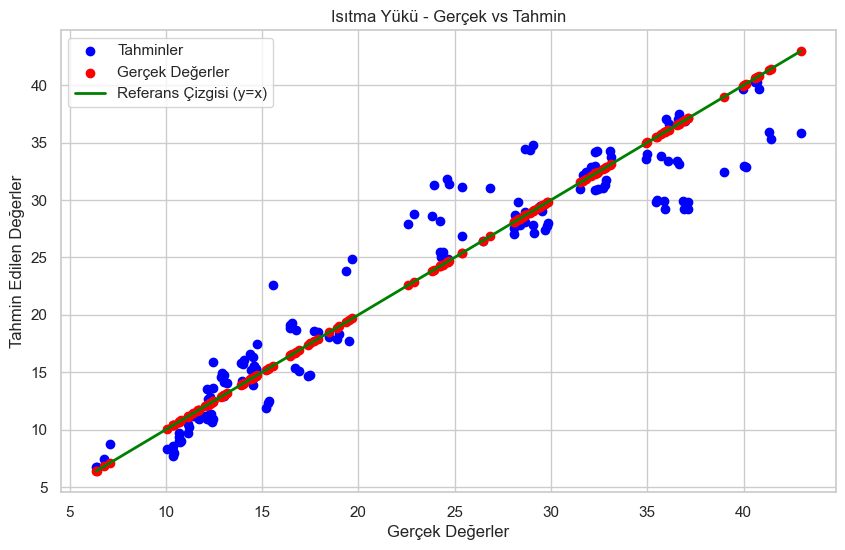

In [69]:
# Tahmin edilen ve gerçek değerleri görselleştirme
plt.figure(figsize=(10, 6))

# Tahmin edilen değerleri mavi ile gösterelim
plt.scatter(y_test_heating, y_pred_heating, color='blue', label='Tahminler')

# Gerçek değerleri kırmızı ile gösterelim
plt.scatter(y_test_heating, y_test_heating, color='red', label='Gerçek Değerler')

# Y=x referans çizgisini ekleyelim
plt.plot([min(y_test_heating["Isıtma_Yükü"]), max(y_test_heating["Isıtma_Yükü"])], [min(y_test_heating["Isıtma_Yükü"]), max(y_test_heating["Isıtma_Yükü"])], color='green', lw=2, label='Referans Çizgisi (y=x)')

# Grafiğin başlık ve eksen adları
plt.title('Isıtma Yükü - Gerçek vs Tahmin')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Legend ekleyelim
plt.legend()

# Grafiği gösterelim
plt.show()


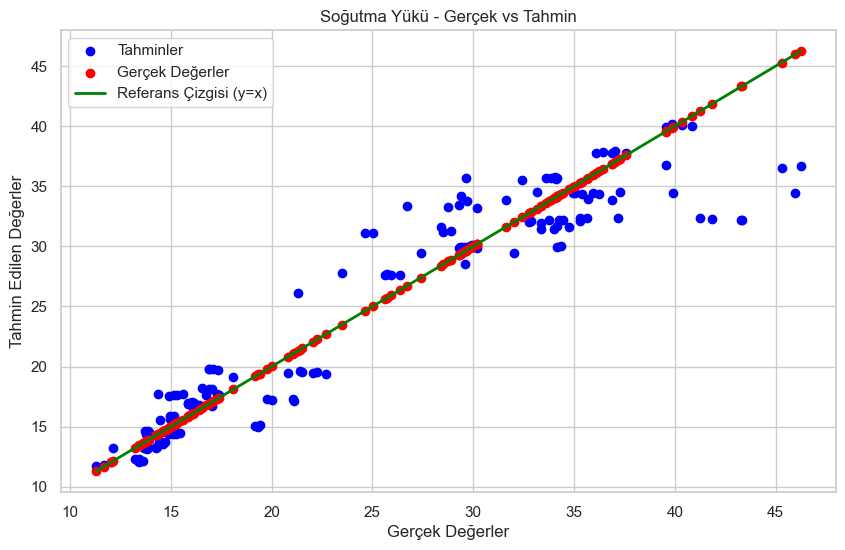

In [70]:
# Tahmin edilen ve gerçek değerleri görselleştirme
plt.figure(figsize=(10, 6))

# Tahmin edilen değerleri mavi ile gösterelim
plt.scatter(y_test_cooling, y_pred_cooling, color='blue', label='Tahminler')

# Gerçek değerleri kırmızı ile gösterelim
plt.scatter(y_test_cooling, y_test_cooling, color='red', label='Gerçek Değerler')

# Y=x referans çizgisini ekleyelim
plt.plot([min(y_test_cooling["Soğutma_Yükü"]), max(y_test_cooling["Soğutma_Yükü"])], [min(y_test_cooling["Soğutma_Yükü"]), max(y_test_cooling["Soğutma_Yükü"])], color='green', lw=2, label='Referans Çizgisi (y=x)')

# Grafiğin başlık ve eksen adları
plt.title('Soğutma Yükü - Gerçek vs Tahmin')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Legend ekleyelim
plt.legend()

# Grafiği gösterelim
plt.show()

## Model İyileştirme: Polinomsal Regresyon

Polinomsal regresyon, bağımsız değişkenlerin doğrusal olmayan etkilerini modellemek için kullanılır. Temel denklem şu şekildedir:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \dots + \beta_n X_1^n + \epsilon
$$

- **X₁, X₁², X₁³, ...**: Bağımsız değişkenlerin polinomsal terimleri.

### Nasıl Hesaplanır?
- Lineer regresyonun genelleştirilmiş halidir. Bağımsız değişkenlerin kuvvetleri (X², X³, vb.) ile genişletilmiş yeni özellikler oluşturulur.
- Lineer regresyon bu genişletilmiş veri setine uygulanarak polinomsal etkiler modele dahil edilir.


Isıtma için

In [76]:

# Polinomsal özellikler ekleme
poly_heating = PolynomialFeatures(degree=2)
X_poly = poly_heating.fit_transform(X_train_heating)

# Polinomsal regresyon modeli
poly_model_heating = LinearRegression()
poly_model_heating.fit(X_poly, y_train_heating)

# Test setindeki tahminler
X_test_poly = poly_heating.transform(X_test_heating)
y_poly_pred = poly_model_heating.predict(X_test_poly)

# Sonuçları değerlendirme
mse_poly = mean_squared_error(y_test_heating, y_poly_pred)
r2_poly = r2_score(y_test_heating, y_poly_pred)

print("Polinomsal Regresyon - MSE:", mse_poly)
print("Polinomsal Regresyon - R2:", r2_poly)


Polinomsal Regresyon - MSE: 1.2658429228001316
Polinomsal Regresyon - R2: 0.9878554724958978


Soğutma için

In [72]:
# Polinomsal özellikler ekleme
poly_cooling = PolynomialFeatures(degree=2)
X_poly = poly_cooling.fit_transform(X_train_cooling)

# Polinomsal regresyon modeli
poly_model_cooling = LinearRegression()
poly_model_cooling.fit(X_poly, y_train_cooling)

# Test setindeki tahminler
X_test_poly = poly_cooling.transform(X_test_cooling)
y_poly_pred = poly_model_cooling.predict(X_test_poly)

# Sonuçları değerlendirme
mse_poly = mean_squared_error(y_test_cooling, y_poly_pred)
r2_poly = r2_score(y_test_cooling, y_poly_pred)

print("Polinomsal Regresyon - MSE:", mse_poly)
print("Polinomsal Regresyon - R2:", r2_poly)

Polinomsal Regresyon - MSE: 4.214331867327776
Polinomsal Regresyon - R2: 0.9545169701765117


## Ridge, Lasso ve ElasticNet Regresyonları

Isıtma için

In [73]:

# Ridge, Lasso ve ElasticNet modellerini oluşturalım
ridge_model_heating = Ridge(alpha=1.0)
lasso_model_heating = Lasso(alpha=0.1)
elastic_model_heating = ElasticNet(alpha=0.1, l1_ratio=0.7)

# Modelleri eğitme
ridge_model_heating.fit(X_train_heating, y_train_heating)
lasso_model_heating.fit(X_train_heating, y_train_heating)
elastic_model_heating.fit(X_train_heating, y_train_heating)

# Test setinde tahmin yapma
y_pred_ridge = ridge_model_heating.predict(X_test_heating)
y_pred_lasso = lasso_model_heating.predict(X_test_heating)
y_pred_elastic = elastic_model_heating.predict(X_test_heating)

# Sonuçların değerlendirilmesi
mse_ridge_heating = mean_squared_error(y_test_heating, y_pred_ridge)
r2_ridge_heating = r2_score(y_test_heating, y_pred_ridge)
mse_lasso_heating = mean_squared_error(y_test_heating, y_pred_lasso)
r2_lasso_heating = r2_score(y_test_heating, y_pred_lasso)
mse_elastic_heating = mean_squared_error(y_test_heating, y_pred_elastic)
r2_elastic_heating = r2_score(y_test_heating, y_pred_elastic)

print("********************************************\n")
print("Ridge Regresyon - MSE:", mse_ridge_heating)
print("Ridge Regresyon - R2:", r2_ridge_heating)
print("\n********************************************\n")
print("Lasso Regresyon - MSE:", mse_lasso_heating)
print("Lasso Regresyon - R2:", r2_lasso_heating)
print("\n********************************************\n")
print("ElasticNet Regresyon - MSE:", mse_elastic_heating)
print("ElasticNet Regresyon - R2:", r2_elastic_heating)
print("\n********************************************\n")

********************************************

Ridge Regresyon - MSE: 9.653457481031017
Ridge Regresyon - R2: 0.9073844963095998

********************************************

Lasso Regresyon - MSE: 10.08900686985949
Lasso Regresyon - R2: 0.9032058249778351

********************************************

ElasticNet Regresyon - MSE: 12.576791021445219
ElasticNet Regresyon - R2: 0.8793379638798962

********************************************



Soğutma için

In [82]:
# Ridge, Lasso ve ElasticNet modellerini oluşturalım
ridge_model_cooling = Ridge(alpha=1)
lasso_model_cooling = Lasso(alpha=0.1)
elastic_model_cooling = ElasticNet(alpha=0.1, l1_ratio=0.7)

# Modelleri eğitme
ridge_model_cooling.fit(X_train_cooling, y_train_cooling)
lasso_model_cooling.fit(X_train_cooling, y_train_cooling)
elastic_model_cooling.fit(X_train_cooling, y_train_cooling)

# Test setinde tahmin yapma
y_pred_ridge = ridge_model_cooling.predict(X_test_cooling)
y_pred_lasso = lasso_model_cooling.predict(X_test_cooling)
y_pred_elastic = elastic_model_cooling.predict(X_test_cooling)

# Sonuçların değerlendirilmesi
mse_ridge_cooling = mean_squared_error(y_test_cooling, y_pred_ridge)
r2_ridge_cooling = r2_score(y_test_cooling, y_pred_ridge)
mse_lasso_cooling = mean_squared_error(y_test_cooling, y_pred_lasso)
r2_lasso_cooling = r2_score(y_test_cooling, y_pred_lasso)
mse_elastic_cooling = mean_squared_error(y_test_cooling, y_pred_elastic)
r2_elastic_cooling = r2_score(y_test_cooling, y_pred_elastic)

print("********************************************\n")
print("Ridge Regresyon - MSE:", mse_ridge_cooling)
print("Ridge Regresyon - R2:", r2_ridge_cooling)
print("\n********************************************\n")
print("Lasso Regresyon - MSE:", mse_lasso_cooling)
print("Lasso Regresyon - R2:", r2_lasso_cooling)
print("\n********************************************\n")
print("ElasticNet Regresyon - MSE:", mse_elastic_cooling)
print("ElasticNet Regresyon - R2:", r2_elastic_cooling)
print("\n********************************************\n")

********************************************

Ridge Regresyon - MSE: 10.345298536350889
Ridge Regresyon - R2: 0.8883487260437098

********************************************

Lasso Regresyon - MSE: 11.040764422255966
Lasso Regresyon - R2: 0.8808429347046199

********************************************

ElasticNet Regresyon - MSE: 12.586754961753059
ElasticNet Regresyon - R2: 0.8641578856794317

********************************************



## 1. Lineer Regresyon (Linear Regression)
Lineer regresyon, bağımsız değişkenlerle bağımlı değişken arasındaki doğrusal ilişkiyi bulmayı amaçlar. Temel denklem şu şekildedir:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

- **Y**: Bağımlı değişken (tahmin edilen sonuç)
- **X₁, X₂, ... , Xₙ**: Bağımsız değişkenler
- **β₀**: Sabit terim (intercept)
- **β₁, β₂, ... , βₙ**: Bağımsız değişkenlerin katsayıları (coefficients)
- **ε**: Hata terimi (residual)

### Nasıl Hesaplanır?
- Amaç, hata terimi olan **ε**’yi en aza indirmektir. Katsayılar, bu hatayı minimum yapan değerler olarak belirlenir.
- **En küçük kareler yöntemi** (Ordinary Least Squares - OLS) kullanılarak bağımlı ve bağımsız değişkenler arasındaki ilişki doğrusal bir denklemle açıklanır.

---

## 2. Polinomsal Regresyon (Polynomial Regression)
Lineer regresyon, bağımsız değişkenlerle bağımlı değişken arasındaki doğrusal ilişkiyi bulmayı amaçlar. Temel denklem şu şekildedir:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

- **Y**: Bağımlı değişken (tahmin edilen sonuç)
- **X₁, X₂, ... , Xₙ**: Bağımsız değişkenler
- **β₀**: Sabit terim (intercept)
- **β₁, β₂, ... , βₙ**: Bağımsız değişkenlerin katsayıları (coefficients)
- **ε**: Hata terimi (residual)

### Nasıl Hesaplanır?
- Amaç, hata terimi olan **ε**’yi en aza indirmektir. Katsayılar, bu hatayı minimum yapan değerler olarak belirlenir.
- **En küçük kareler yöntemi** (Ordinary Least Squares - OLS) kullanılarak bağımlı ve bağımsız değişkenler arasındaki ilişki doğrusal bir denklemle açıklanır.


---

## 3. Ridge Regresyonu (Ridge Regression)
Ridge regresyonu, çoklu doğrusal bağımlılık (multicollinearity) durumlarında aşırı uyumu (overfitting) azaltmak için kullanılır. Lineer regresyon modeline **L2 normu** cezası ekler:

$$
\text{Cost function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

- **λ (lambda)**: Ceza terimini kontrol eden bir parametre. λ ne kadar büyükse, model daha fazla cezalandırılır ve katsayılar küçülmeye zorlanır.
- **L2 normu**: Katsayıların karelerinin toplamı.

### Nasıl Hesaplanır?
- Ridge, OLS’ye benzer şekilde çalışır, ancak katsayıların büyüklüğünü sınırlamak için ek bir ceza terimi ekler. Bu, özellikle bağımsız değişkenler arasında yüksek korelasyon olduğunda kullanışlıdır.

---

## 4. Lasso Regresyonu (Lasso Regression)
Lasso regresyonu, önemli olmayan bağımsız değişkenleri tamamen sıfırlayarak modelin basitleştirilmesini sağlar. Lineer regresyon modeline **L1 normu** cezası ekler:

$$
\text{Cost function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

- **L1 normu**: Katsayıların mutlak değerlerinin toplamı.

### Nasıl Hesaplanır?
- Ridge ile benzerdir, ancak ceza terimi L2 yerine L1 normu kullanır. Lasso’nun önemli özelliği, bazı katsayıları tamamen sıfıra indirebilmesidir. Böylece model daha basit ve daha açıklayıcı olur.

---

## 5. ElasticNet Regresyonu (ElasticNet Regression)
ElasticNet, Ridge ve Lasso regresyonlarını birleştiren bir yaklaşımdır. Hem **L1** hem de **L2** normu cezası içerir:

$$
\text{Cost function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2
$$

- **λ₁**: Lasso’daki gibi L1 cezasını kontrol eder.
- **λ₂**: Ridge’deki gibi L2 cezasını kontrol eder.

### Nasıl Hesaplanır?
- ElasticNet, hem Lasso'nun sıfırlama özelliğini hem de Ridge'in katsayıları küçültme özelliğini kullanır. Bu iki ceza terimini birleştirerek, daha dengeli ve esnek bir model oluşturur.
